In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [3]:
#importing Final Conversion data
final_con= pd.read_csv("Problem2_FInalConversions.txt", sep="\t", names=['timestamp','userid','product','cart_amt'])

In [4]:
final_con.head()


,timestamp,userid,product,cart_amt
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


timestamp    0
userid       0
product      0
cart_amt     0
dtype: int64

In [9]:
final_con.dtypes


timestamp     object
userid         int64
product       object
cart_amt     float64
dtype: object

In [10]:
final_con.isnull().sum()

timestamp    0
userid       0
product      0
cart_amt     0
dtype: int64

In [12]:
final_con.count()

timestamp    79795
userid       79795
product      79795
cart_amt     79795
dtype: int64

In [13]:
final_con['userid'].nunique() #41009


41009

In [ ]:
final_con['userid'].unique() #41009


In [14]:
final_con['product'].unique()

array(['A293532', 'H209597', 'H211370', ...,
       'A275419,A277345,A291089,A290115,A288587,A236937', 'A268231',
       'A296470,H211800,H210000'], dtype=object)

In [15]:
final_con['product'].nunique()

13066

In [10]:
final_con.groupby('userid')['timestamp'].count()

userid
0                      20197
2941287703                 1
71023925710020             1
394529638495081            1
430191686443660            2
887103105578626            1
962713767308725            2
1061744603054893           1
1484686624382447           1
1698034351507270           1
2164499318886260           5
2243119619438503           1
2768539785487985           1
3017190391603323           1
3678780214674430           1
3680894349014675           1
3691780313186402           1
3729758305600473           1
3771133954730063           1
3817439128416145           1
4236873281318028           3
4525998508004520           2
4743222304577563           1
5120716214496478           1
5459017522862655           1
5910628691007396           2
5942997097932061           1
6019530677802700           1
6557803471397238           1
7128808619903086           1
                       ...  
9216375976934655968        1
9216741178188685901        1
9216857839110443567        1
9216920

In [16]:
final_con[final_con['userid']==5942997097932061]

,timestamp,userid,product,cart_amt
548,2017-07-26 00:00:15.267,5942997097932061,K43931,157.95


In [17]:
final_con[final_con['userid']==2164499318886260]

,timestamp,userid,product,cart_amt
4422,2017-07-26 01:03:10.027,2164499318886260,H211410,31.24
12371,2017-07-26 03:06:01.381,2164499318886260,H211397,38.24
18945,2017-07-26 01:03:10.176,2164499318886260,H211394,39.18
18946,2017-07-26 01:03:10.314,2164499318886260,H211394,39.18
30744,2017-07-26 03:06:01.576,2164499318886260,H211397,27.24


In [19]:
final_con[final_con['userid']==0].count()

timestamp    20197
userid       20197
product      20197
cart_amt     20197
dtype: int64

In [5]:
# Importing Browsing Behaviour Data
bh= pd.read_csv("Problem2_Site_BrowingBehavior.txt", sep="\t", names=['timestamp','userid','websec'])
bh.head(10)

,timestamp,userid,websec
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content
5,2017-07-26 00:45:48.487,0,home
6,2017-07-26 00:46:25.033,0,product-listing-category
7,2017-07-26 00:47:06.513,0,product-listing-category
8,2017-07-26 00:47:26.001,0,content
9,2017-07-26 00:48:00.868,0,home


In [21]:
bh.isnull().sum()

timestamp    0
userid       0
websec       0
dtype: int64

In [22]:
bh.count()

timestamp    5535924
userid       5535924
websec       5535924
dtype: int64

In [ ]:
bh.dtypes

In [23]:
bh.columns

Index(['timestamp', 'userid', 'web sec'], dtype='object')

In [24]:
bh.head(10)

,timestamp,userid,web sec
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content
5,2017-07-26 00:45:48.487,0,home
6,2017-07-26 00:46:25.033,0,product-listing-category
7,2017-07-26 00:47:06.513,0,product-listing-category
8,2017-07-26 00:47:26.001,0,content
9,2017-07-26 00:48:00.868,0,home


In [24]:
#finding the no of unique values of web sections present in data
bh['websec'].nunique()

17

In [23]:
bh['websec'].unique()

array(['product', 'default', 'product-listing-category', 'content',
       'home', 'cart', 'product-listing-search', 'iroa', 'shoplive',
       'productNotFound', 'product-listing-custom', 'signupcomplete',
       'mys', 'error', 'lorigreiner', 'wishlist', 'category'],
      dtype=object)

In [4]:
# Data Cleaning and Preprocessing
#1.#timestamp column type is object for making it useful conver it to timestamp format
from dateutil.parser import parse

bh['timestamp']=[parse(x) for x in bh['timestamp']]


In [5]:
final_con['timestamp']=[parse(x) for x in final_con['timestamp']]

In [26]:
#checking the types of column after conveting
final_con.dtypes

timestamp    datetime64[ns]
userid                int64
product              object
cart_amt            float64
dtype: object

In [27]:
bh.dtypes

timestamp    datetime64[ns]
userid                int64
websec               object
dtype: object

In [ ]:
# we can extract day, hour, weekday from timestamp 
#and can use find some relation with the respose var purchades

#final_con['date'] = final_con['timestamp'].dt.date
#final_con['day'] = final_con['timestamp'].dt.day
#final_con['hour'] = final_con['timestamp'].dt.hour
#final_con['weekday'] = final_con['timestamp'].dt.dayofweek


In [ ]:
# we can do same for the Browsing Behaviour data
#bh['date'] = bh['timestamp'].dt.date
#bh['day'] = bh['timestamp'].dt.day
#bh['hour'] = bh['timestamp'].dt.hour
#bh['weekday'] = bh['timestamp'].dt.dayofweek


In [28]:
final_con.count()


timestamp    79795
userid       79795
product      79795
cart_amt     79795
dtype: int64

In [6]:
#As there are many observations without UserId,saving all rows with 0 UserId to a new dataframe final_con2

#final conversion data with userid=0
final_con2=final_con[final_con.userid == 0]
## we can use this data later on to improve the model 
##performance because all these users have purchased some products
#So we can append this data to final merged data


final_con2.count()

timestamp    20197
userid       20197
product      20197
cart_amt     20197
dtype: int64

In [7]:
##final conversion data without userid=0

final_con1=final_con[final_con.userid != 0]
final_con1.count()


timestamp    59598
userid       59598
product      59598
cart_amt     59598
dtype: int64

In [48]:
bh.count()

timestamp    5535924
userid       5535924
websec       5535924
dtype: int64

In [45]:
bh[bh['userid']==0].count()

timestamp    1407879
userid       1407879
websec       1407879
dtype: int64

In [8]:
# Browsing Behaviour data without userid=0
bh1=bh[bh.userid != 0]
bh1.dtypes

timestamp    object
userid        int64
websec       object
dtype: object

In [9]:
# Browsing Behaviour data with userid=0
bh2=bh[bh.userid == 0]
bh2.dtypes

timestamp    object
userid        int64
websec       object
dtype: object

In [50]:
bh1.count()

timestamp    4128045
userid       4128045
websec       4128045
dtype: int64

In [51]:
bh2.count()

timestamp    1407879
userid       1407879
websec       1407879
dtype: int64

In [52]:
bh1.head()

,timestamp,userid,websec
101129,2017-07-26 00:47:58.320,544439661706349,product
101130,2017-07-26 00:09:03.411,634394594974068,content
101131,2017-07-26 00:09:09.116,634394594974068,content
101132,2017-07-26 00:11:07.333,634394594974068,content
101133,2017-07-26 00:11:29.141,634394594974068,content


In [62]:
final_con1.head()

,timestamp,userid,product,cart_amt
548,2017-07-26 00:00:15.267,5942997097932061,K43931,157.95
549,2017-07-26 00:26:44.266,23951842225160889,H211370,33.48
550,2017-07-26 00:26:44.361,23951842225160889,H211370,27.48
551,2017-07-26 00:55:37.774,30833658052409950,H211394,44.68
552,2017-07-26 00:10:46.954,33873861847792934,H211800,53.24


In [53]:
bh2.head()

,timestamp,userid,websec
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [54]:
bh1['websec'].nunique()

16

In [56]:
final_con1['product'].nunique()

11000

In [10]:
## create new dataframes with only required columns
bh3=bh1.drop(columns=['timestamp'],axis=1)
final_con3=final_con1.drop(columns=['timestamp','cart_amt'],axis=1)

In [58]:
bh3.head()

,userid,websec
101129,544439661706349,product
101130,634394594974068,content
101131,634394594974068,content
101132,634394594974068,content
101133,634394594974068,content


In [59]:
final_con3.head()

,userid,product
548,5942997097932061,K43931
549,23951842225160889,H211370
550,23951842225160889,H211370
551,30833658052409950,H211394
552,33873861847792934,H211800


In [ ]:
final_con2.isna().sum()

In [ ]:
bh2.isna().sum()

In [11]:
#create new column purchased with values set to 1 in final conversion data
final_con3['purchased']=1

In [82]:
final_con3.dtypes

userid        int64
product      object
purchased     int64
dtype: object

In [12]:
merged=pd.merge(bh3,final_con3,on='userid', how='left')

In [13]:
merged.head()

,userid,websec,product,purchased
0,544439661706349,product,NaN,NaN
1,634394594974068,content,NaN,NaN
2,634394594974068,content,NaN,NaN
3,634394594974068,content,NaN,NaN
4,634394594974068,content,NaN,NaN


In [14]:
merged.tail()

,userid,websec,product,purchased
4923843,9221827579306644828,product,K45797,1.0
4923844,9221827579306644828,product,V34417,1.0
4923845,9221827579306644828,product,K45797,1.0
4923846,9221827579306644828,product,V34417,1.0
4923847,9223103337073924884,product,NaN,NaN


In [75]:
merged.shape

(4923848, 4)

In [72]:
merged.count()

userid       4923848
websec       4923848
product      1643740
purchased    1643740
dtype: int64

In [87]:
merged.dtypes

userid         int64
websec        object
product       object
purchased    float64
dtype: object

In [14]:
merged['purchased']=merged['purchased'].replace(np.nan, 0)

In [173]:
merged.isna().sum()

userid             0
websec             0
product      3280108
purchased          0
dtype: int64

In [108]:
merged.dtypes

userid        int64
websec       object
product      object
purchased     int32
dtype: object

In [15]:
#change datatype of purchased column to int
merged['purchased']=merged.purchased.astype(int)

In [175]:
#checking the missing values in each column
merged.isnull().sum()

userid             0
websec             0
product      3280108
purchased          0
dtype: int64

In [167]:
merged.head()

,userid,websec,product,purchased
0,544439661706349,product,NaN,0
1,634394594974068,content,NaN,0
2,634394594974068,content,NaN,0
3,634394594974068,content,NaN,0
4,634394594974068,content,NaN,0


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#le_websec = LabelEncoder()

#merged['websec_code'] = le_websec.fit_transform(merged['websec'])


merged = pd.get_dummies(merged, columns=['websec'], prefix = ['websec'])

merged.head(10)

,userid,product,purchased,websec_cart,websec_category,websec_content,websec_default,websec_error,websec_home,websec_iroa,websec_lorigreiner,websec_mys,websec_product,websec_product-listing-category,websec_product-listing-custom,websec_product-listing-search,websec_productNotFound,websec_shoplive,websec_signupcomplete
0,544439661706349,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,634394594974068,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,634394594974068,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,634394594974068,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,634394594974068,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,887103105578626,A293532,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,887103105578626,A293532,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,962713767308725,A300254,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,962713767308725,A283870,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,962713767308725,A300254,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
merged.tail()


,userid,product,purchased,websec_cart,websec_category,websec_content,websec_default,websec_error,websec_home,websec_iroa,websec_lorigreiner,websec_mys,websec_product,websec_product-listing-category,websec_product-listing-custom,websec_product-listing-search,websec_productNotFound,websec_shoplive,websec_signupcomplete
4923843,9221827579306644828,K45797,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923844,9221827579306644828,V34417,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923845,9221827579306644828,K45797,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923846,9221827579306644828,V34417,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923847,9223103337073924884,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
merged['product']=merged['product'].replace(np.nan, 0)

In [178]:
merged.dtypes

userid                              int64
product                            object
purchased                           int32
websec_cart                         uint8
websec_category                     uint8
websec_content                      uint8
websec_default                      uint8
websec_error                        uint8
websec_home                         uint8
websec_iroa                         uint8
websec_lorigreiner                  uint8
websec_mys                          uint8
websec_product                      uint8
websec_product-listing-category     uint8
websec_product-listing-custom       uint8
websec_product-listing-search       uint8
websec_productNotFound              uint8
websec_shoplive                     uint8
websec_signupcomplete               uint8
dtype: object

In [19]:
merged['product'] =merged['product'].astype('category')

In [20]:
#Encoding product column 
le_product = LabelEncoder()
merged['product'] = le_product.fit_transform(merged['product'].astype(str))

In [181]:
merged['product'].nunique()


10964

In [183]:
merged['userid'].nunique()

516931

In [184]:
#No of people purchased product vs not purchased product
merged.groupby('purchased')['userid'].count()


purchased
0    3280108
1    1643740
Name: userid, dtype: int64

In [191]:
merged.head()

,userid,purchased,websec_cart,websec_category,websec_content,websec_default,websec_error,websec_home,websec_iroa,websec_lorigreiner,websec_mys,websec_product,websec_product-listing-category,websec_product-listing-custom,websec_product-listing-search,websec_productNotFound,websec_shoplive,websec_signupcomplete
0,544439661706349,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,634394594974068,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,634394594974068,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,634394594974068,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,634394594974068,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
merged=merged.drop(columns=['userid','product'],axis=1)

In [27]:
merged.tail()

,purchased,websec_cart,websec_category,websec_content,websec_default,websec_error,websec_home,websec_iroa,websec_lorigreiner,websec_mys,websec_product,websec_product-listing-category,websec_product-listing-custom,websec_product-listing-search,websec_productNotFound,websec_shoplive,websec_signupcomplete
4923843,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923844,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923845,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923846,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4923847,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


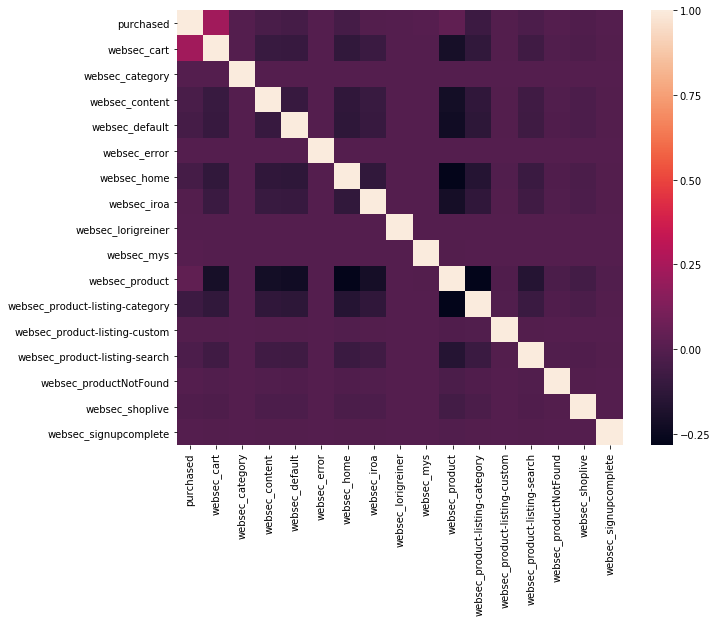

In [28]:
#Correlation Matrix using Heatmap
plt.figure(figsize=(10,8))
sb.heatmap(merged.corr(), annot=False)

In [22]:
merged.corr()

,userid,purchased,websec_cart,websec_category,websec_content,websec_default,websec_error,websec_home,websec_iroa,websec_lorigreiner,websec_mys,websec_product,websec_product-listing-category,websec_product-listing-custom,websec_product-listing-search,websec_productNotFound,websec_shoplive,websec_signupcomplete
userid,1.000000,0.003873,-0.000339,-9.563762e-05,-0.001942,0.002425,-0.001534,0.000095,-0.000454,1.166802e-04,0.004641,0.001565,-0.000675,-0.001213,-0.002238,0.000600,-0.000466,0.000003
purchased,0.003873,1.000000,0.232503,-3.190217e-04,-0.033903,-0.049420,-0.000502,-0.050316,-0.006746,-4.511649e-04,0.002938,0.032957,-0.081743,-0.003248,-0.028027,-0.002334,-0.014162,-0.000428
websec_cart,-0.000339,0.232503,1.000000,-1.315921e-04,-0.089154,-0.094095,-0.000756,-0.114049,-0.087406,-1.860994e-04,-0.001368,-0.207315,-0.116838,-0.006503,-0.063969,-0.012268,-0.022737,-0.004477
websec_category,-0.000096,-0.000319,-0.000132,1.000000e+00,-0.000138,-0.000145,-0.000001,-0.000176,-0.000135,-2.872172e-07,-0.000002,-0.000320,-0.000180,-0.000010,-0.000099,-0.000019,-0.000035,-0.000007
websec_content,-0.001942,-0.033903,-0.089154,-1.375964e-04,1.000000,-0.098389,-0.000790,-0.119253,-0.091395,-1.945907e-04,-0.001430,-0.216774,-0.122169,-0.006800,-0.066888,-0.012828,-0.023774,-0.004681
websec_default,0.002425,-0.049420,-0.094095,-1.452226e-04,-0.098389,1.000000,-0.000834,-0.125862,-0.096460,-2.053757e-04,-0.001509,-0.228789,-0.128941,-0.007177,-0.070595,-0.013539,-0.025092,-0.004940
websec_error,-0.001534,-0.000502,-0.000756,-1.166686e-06,-0.000790,-0.000834,1.000000,-0.001011,-0.000775,-1.649943e-06,-0.000012,-0.001838,-0.001036,-0.000058,-0.000567,-0.000109,-0.000202,-0.000040
websec_home,0.000095,-0.050316,-0.114049,-1.760179e-04,-0.119253,-0.125862,-0.001011,1.000000,-0.116915,-2.489270e-04,-0.001829,-0.277305,-0.156283,-0.008699,-0.085566,-0.016410,-0.030413,-0.005988
websec_iroa,-0.000454,-0.006746,-0.087406,-1.348990e-04,-0.091395,-0.096460,-0.000775,-0.116915,1.000000,-1.907760e-04,-0.001402,-0.212525,-0.119775,-0.006667,-0.065577,-0.012576,-0.023308,-0.004589
websec_lorigreiner,0.000117,-0.000451,-0.000186,-2.872172e-07,-0.000195,-0.000205,-0.000002,-0.000249,-0.000191,1.000000e+00,-0.000003,-0.000452,-0.000255,-0.000014,-0.000140,-0.000027,-0.000050,-0.000010


In [24]:
# Model Building 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [28]:
model=LogisticRegression()

In [31]:
X=merged.drop(columns=['purchased'],axis=1)
y=merged['purchased']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [33]:
model.fit(X_train,y_train)

C:\Users\Prakash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred=model.predict(X_test)

In [45]:
from sklearn.metrics import  confusion_matrix, classification_report,accuracy_score
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[950606,  33548],
       [410627,  82374]], dtype=int64)

In [ ]:
print("Accuracy:\n",accuracy_score(y_test, y_pred))
#print("Precision:",precision_score(y_test, y_pred))
#print("Recall:",recall_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

In [ ]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

In [147]:
## SVM (rbf)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

